# Read dataset

In [8]:
import pandas as pd

filename = 'C:/Users/ShatheepR/Desktop/APAC Account Strategy/Revenue Report v3.txt'
data = pd.read_csv(filename, sep='\t')#, lineterminator='\r')
data.head(3)

ParserError: Error tokenizing data. C error: Expected 13 fields in line 2361553, saw 16


In [9]:
import pandas as pd

filename = 'C:/Users/ShatheepR/Desktop/Revenue Report v3.csv'
data = pd.read_csv(filename)#, lineterminator='\r')
data.head(3)

,YEAR,MONTH,GB_GC_CN,COMPANY_NAME,BUSINESS_UNIT,BRAND_LEVEL_1,BRAND_LEVEL_2,GEO_LEVEL_1,GEO_LEVEL_2,GEO_LEVEL_3,INDUSTRY,CLIENT_TYPE,REVENUE
0,2019,11,GB000GJA,GENERAL ELECTRIC,NaN,NaN,NaN,Americas,Latin America,Colombia,Wholesale Distribution & Services,NaN,3358.82
1,2016,5,GB000DCV,EXXON MOBIL CORPORATION,NaN,NaN,NaN,Americas,Canadian Market,Canada,Chemicals & Petroleum,NaN,10949.67
2,2016,9,GB0010N6,BPER BANCA,Systems w/TPS,Storage,Storage for Z Systems Market,EMEA,Italy Market,Italy,Banking,Segment 1,689860.54


In [16]:
' MONTH' in data
data.columns = data.columns.str.replace(' ', '')
print(data.dtypes)

YEAR               int64
MONTH              int64
GB_GC_CN          object
COMPANY_NAME      object
BUSINESS_UNIT     object
BRAND_LEVEL_1     object
BRAND_LEVEL_2     object
GEO_LEVEL_1       object
GEO_LEVEL_2       object
GEO_LEVEL_3       object
INDUSTRY          object
CLIENT_TYPE       object
REVENUE          float64
dtype: object


In [17]:
# Create TotalSum column for online dataset
data['MONTH'] = data['MONTH'].astype('str')
data['YEAR'] = data['YEAR'].astype('str')
data['MONTH'] = data['MONTH'].str.zfill(2)
data['Date'] = data['YEAR'].str.cat(data['MONTH'], sep ="") + '28'
print(data['Date'].head(5))

0    20191128
1    20160528
2    20160928
3    20190128
4    20160128
Name: Date, dtype: object


In [18]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
#data.dtypes
data.head(2)

,YEAR,MONTH,GB_GC_CN,COMPANY_NAME,BUSINESS_UNIT,BRAND_LEVEL_1,BRAND_LEVEL_2,GEO_LEVEL_1,GEO_LEVEL_2,GEO_LEVEL_3,INDUSTRY,CLIENT_TYPE,REVENUE,Date
0,2019,11,GB000GJA,GENERAL ELECTRIC,NaN,NaN,NaN,Americas,Latin America,Colombia,Wholesale Distribution & Services,NaN,3358.82,2019-11-28
1,2016,05,GB000DCV,EXXON MOBIL CORPORATION,NaN,NaN,NaN,Americas,Canadian Market,Canada,Chemicals & Petroleum,NaN,10949.67,2016-05-28


In [19]:
# Grouping by GB_GC_CN
summary = data.groupby(['BUSINESS_UNIT']).agg({'REVENUE': 'sum'}).reset_index_index()
summary

AttributeError: 'DataFrame' object has no attribute 'reset_index_index'

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242228 entries, 0 to 2242227
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   YEAR           object        
 1   MONTH          object        
 2   GB_GC_CN       object        
 3   COMPANY_NAME   object        
 4   BUSINESS_UNIT  object        
 5   BRAND_LEVEL_1  object        
 6   BRAND_LEVEL_2  object        
 7   GEO_LEVEL_1    object        
 8   GEO_LEVEL_2    object        
 9   GEO_LEVEL_3    object        
 10  INDUSTRY       object        
 11  CLIENT_TYPE    object        
 12  REVENUE        float64       
 13  Date           datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 239.5+ MB


In [21]:
data.describe()

,REVENUE
count,2.242228e+06
mean,1.069569e+05
std,1.289286e+06
min,-4.983695e+08
25%,3.312400e+02
50%,2.334320e+03
75%,1.523926e+04
max,1.854242e+08


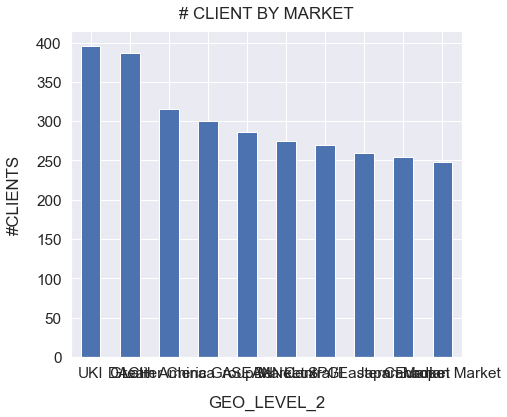

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#APAC Market's customer#
filtered_data = data.groupby(['GB_GC_CN','GEO_LEVEL_2']).agg({'REVENUE': 'sum'})
filtered_data1 = filtered_data[filtered_data.REVENUE>=0.001].reset_index()
filtered_data1.GEO_LEVEL_2.value_counts()[:10].plot(kind='bar', figsize=(7, 6), rot=0 ); 

sns.set(font_scale=1.4)
plt.xlabel('GEO_LEVEL_2', labelpad=14)
plt.ylabel('#CLIENTS', labelpad=14)
plt.title('# CLIENT BY MARKET', y=1.02);

In [24]:
# Create snapshot date
from datetime import datetime, timedelta
snapshot_date = data['Date'].max() + timedelta(days=0)
print(snapshot_date)

2020-12-28 00:00:00


In [25]:
# Grouping by GB_GC_CN
summary = data.groupby(['GB_GC_CN', 'MONTH', 'BUSINESS_UNIT']).agg({'REVENUE': 'sum'})
summary.to_excel("C:/Users/ShatheepR/Desktop/summary.xlsx", sheet_name='summary')

In [27]:
# Grouping by GB_GC_CN
raw_export = data[data['GB_GC_CN'] == 'GB000M4U'] #GB000KAZ
raw_export.to_excel("C:/Users/ShatheepR/Desktop/raw_data.xlsx", sheet_name='summary')

In [28]:
data_recency = pd.DataFrame(data.groupby(['GB_GC_CN']).agg({'Date': lambda x: (snapshot_date - x.max()).days})).reset_index()
data_recency.head(5)

,GB_GC_CN,Date
0,00023197,0
1,00032306,1461
2,00033500,0
3,00049960,1552
4,00051259,0


In [29]:
# Grouping by GB_GC_CN
data1 = data.groupby(['GB_GC_CN', 'YEAR', 'MONTH']).agg({'REVENUE': 'sum'})
data2 = data1[data1['REVENUE']>=10000]
data_frequency = pd.DataFrame(data2.groupby('GB_GC_CN').agg([('Frequency','count')]).reset_index())
data_frequency.head(5)

,GB_GC_CN,REVENUE
,,Frequency
0,00023197,27
1,00032306,1
2,00033500,12
3,00049960,1
4,00051259,53


In [31]:
# Grouping by GB_GC_CN
data_revenue = pd.DataFrame(data2.groupby('GB_GC_CN').agg([('','sum')]).reset_index())
data_revenue.sum()

GB_GC_CN      0002319700032306000335000004996000051259000663...
REVENUE                                             2.42975e+11
dtype: object

In [32]:
#frames = [data_recency, data_frequency, data_revenue]
#data_final = pd.concat(frames, axis=1, keys=["GB_GC_CN"])
intermediate = pd.merge(data_revenue, data_recency, on="GB_GC_CN")
data_final = pd.merge(intermediate, data_frequency, on="GB_GC_CN")
data_final.rename(columns={'Date': 'Recency'}, inplace=True)
data_final.head(3)

C:\ProgramData\WatsonStudioDesktop\miniconda3\envs\desktop\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\WatsonStudioDesktop\miniconda3\envs\desktop\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\WatsonStudioDesktop\miniconda3\envs\desktop\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,GB_GC_CN,"(GB_GC_CN, )","(REVENUE, )",Recency,"(REVENUE, Frequency)"
0,00023197,00023197,6189444.20,0,27
1,00032306,00032306,1016243.24,1461,1
2,00033500,00033500,2424000.52,0,12


In [33]:
print(data_final.head(5))
print('{:,} rows; {:,} columns'
      .format(data_final.shape[0], data_final.shape[1]))

   GB_GC_CN (GB_GC_CN, )  (REVENUE, )  Recency  (REVENUE, Frequency)
0  00023197     00023197   6189444.20        0                    27
1  00032306     00032306   1016243.24     1461                     1
2  00033500     00033500   2424000.52        0                    12
3  00049960     00049960    449336.95     1552                     1
4  00051259     00051259   5909580.29        0                    53
1,857 rows; 5 columns


In [34]:
data_final.drop(data_final.columns[1], axis = 1, inplace = True)

In [35]:
data_final = data_final.rename(columns = {data_final.columns[1] : 'MonetaryValue'})
data_final = data_final.rename(columns = {data_final.columns[3] : 'Frequency'})

In [36]:
data_final

,GB_GC_CN,MonetaryValue,Recency,Frequency
0,00023197,6189444.20,0,27
1,00032306,1016243.24,1461,1
2,00033500,2424000.52,0,12
3,00049960,449336.95,1552,1
4,00051259,5909580.29,0,53
...,...,...,...,...
1852,GCYFJXRL,2992522.65,0,24
1853,GCYJMT4J,301110.76,0,1
1854,GCYRGV9W,476813.80,0,7
1855,GCZ92ZFG,442196.24,0,11


In [37]:
data_final.dropna(inplace = True)

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

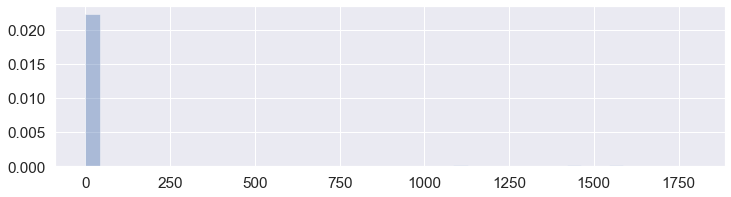

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_final['Recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_final['Frequency'])

# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_final['MonetaryValue'])

# Show the plot
plt.show()

In [39]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
import numpy as np
r_labels = range(4, 0, -1)
f_labels = range(1, 5)

#a = pd.Series(range(100) + ([0]*20))

#Adding a noise
def jitter(a_series, noise_reduction=1000000):
#    a_series = list(range(a_series))
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_final['Recency'] + jitter(data_final['Recency']), q=4, labels=r_labels)# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_final['Frequency']+ jitter(data_final['Frequency']), q=4, labels=f_labels)# Create new columns R and F 
data_final = data_final.assign(R = r_groups.values, F = f_groups.values)
data_final.head()

,GB_GC_CN,MonetaryValue,Recency,Frequency,R,F
0,00023197,6189444.20,0,27,4,1
1,00032306,1016243.24,1461,1,1,1
2,00033500,2424000.52,0,12,1,1
3,00049960,449336.95,1552,1,1,1
4,00051259,5909580.29,0,53,4,1


In [40]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_final['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
data_final = data_final.assign(M = m_groups.values)

In [41]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])
data_final['RFM_Segment_Concat'] = data_final.apply(join_rfm, axis=1)
rfm = data_final
rfm.head()

,GB_GC_CN,MonetaryValue,Recency,Frequency,R,F,M,RFM_Segment_Concat
0,00023197,6189444.20,0,27,4,1,2,412
1,00032306,1016243.24,1461,1,1,1,1,111
2,00033500,2424000.52,0,12,1,1,1,111
3,00049960,449336.95,1552,1,1,1,1,111
4,00051259,5909580.29,0,53,4,1,2,412


In [42]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

64


In [43]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

0    7.0
1    3.0
2    3.0
3    3.0
4    7.0
Name: RFM_Score, dtype: float64


In [44]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)# Print the header with top 5 rows to the console
rfm.head()

,GB_GC_CN,MonetaryValue,Recency,Frequency,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
0,00023197,6189444.20,0,27,4,1,2,412,7.0,Loyal
1,00032306,1016243.24,1461,1,1,1,1,111,3.0,Require Activation
2,00033500,2424000.52,0,12,1,1,1,111,3.0,Require Activation
3,00049960,449336.95,1552,1,1,1,1,111,3.0,Require Activation
4,00051259,5909580.29,0,53,4,1,2,412,7.0,Loyal


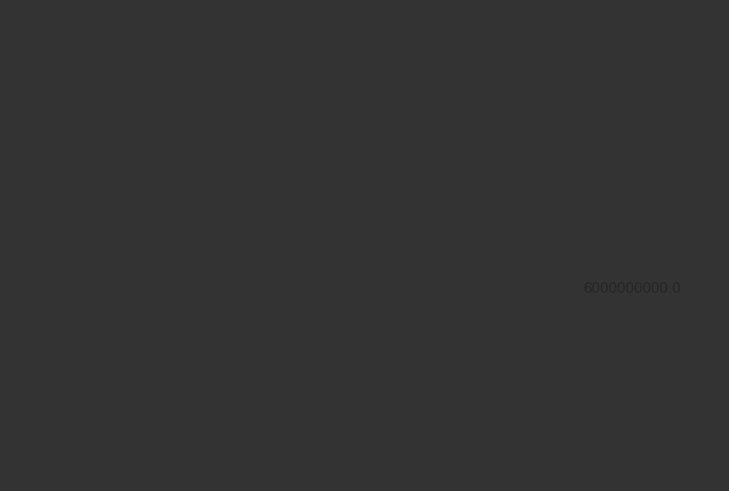

In [45]:
plt.figure(figsize=(12, 8))
minsize = min(rfm['MonetaryValue'])
maxsize = max(rfm['MonetaryValue'])
#c_normal = MonetaryValue / MonetaryValue.max()
sns.scatterplot(data = rfm, x = "Recency", y = "Frequency", hue = "RFM_Level", size = "MonetaryValue", sizes=(minsize, maxsize), palette='hot') #'hot' 'Spectral'
sns.set(style='dark',) # 'whitegrid'

Text(0, 0.5, 'Frequency in #Months')

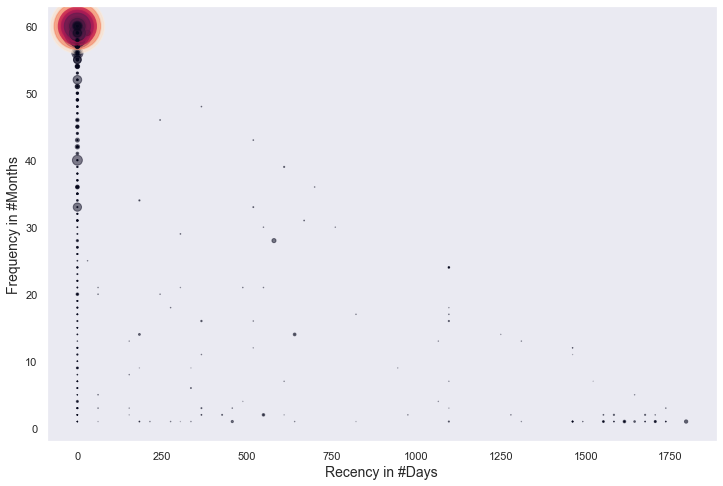

In [46]:

Recency = rfm['Recency']
Frequency = rfm['Frequency']
MonetaryValue = rfm['MonetaryValue']

RFM_Level = rfm.RFM_Level.unique()

colors = {'Can\'t Loose Them':'red', 'Champions':'green', 'Loyal':'blue', 'Potential':'yellow', 'Promising':'orange', 'Needs Attention':'purple', 'Require Activation':'black'}

colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:yellow', 'tab:orange', 'tab:purple', 'tab:black']

c_normal = MonetaryValue / MonetaryValue.max()

c_fr = sorted(Frequency, reverse=True)
c_rc = sorted(Recency, reverse=False)

plt.figure(figsize=(12, 8))
#plt.scatter(years, Frequency, 
#                  c=c_br,
#                 alpha=0.5,
#                 s = b_normal * 2000)
plt.scatter(Recency, Frequency, c = MonetaryValue, alpha=0.5, s = c_normal * 3000, label=rfm['RFM_Level']) #, edgecolors='none'
plt.xlabel("Recency in #Days", size=14)
plt.ylabel("Frequency in #Months", size=14)

Text(0, 0.5, 'Frequency in #Months')

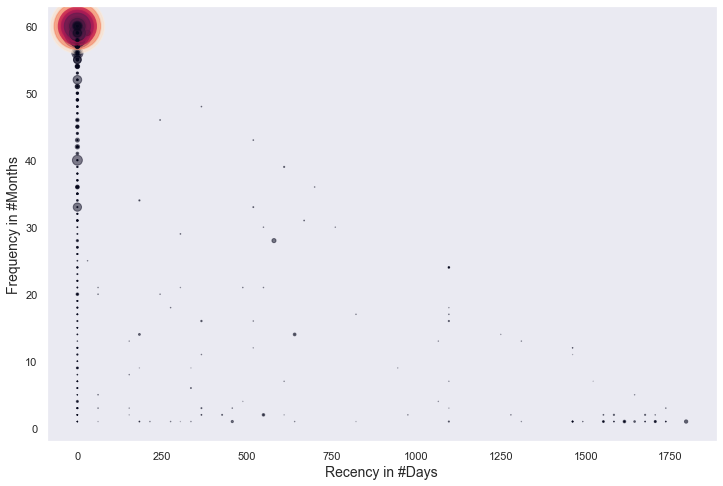

In [47]:
c_rc = sorted(Recency, reverse=True)
plt.figure(figsize=(12, 8))
plt.scatter(Recency, Frequency, 
                  c=MonetaryValue,
                 alpha=0.5,
                 s = c_normal * 3000,
                 )
plt.xlabel("Recency in #Days", size=14)
plt.ylabel("Frequency in #Months", size=14)

In [48]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them       0.0      60.0   269685992.0   722
Champions              0.0      59.0   112349730.0   280
Loyal                  0.0      59.0    55311758.0   243
Needs Attention      129.0      31.0     3113637.0   103
Potential              0.0      46.0    11471034.0   207
Promising              4.0      39.0     3926994.0   140
Require Activation   671.0      14.0      731713.0   162


In [49]:
rfm.to_excel("C:/Users/ShatheepR/Desktop/final.xlsx", sheet_name='data_final')

From here, we can see that a large percentage (~60%) of our customers are in the top tier RFM levels. The store must be doing something right to be maintaining their loyalty!

Potential — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!

Promising — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.

Needs Attention — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.

Require Activation — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

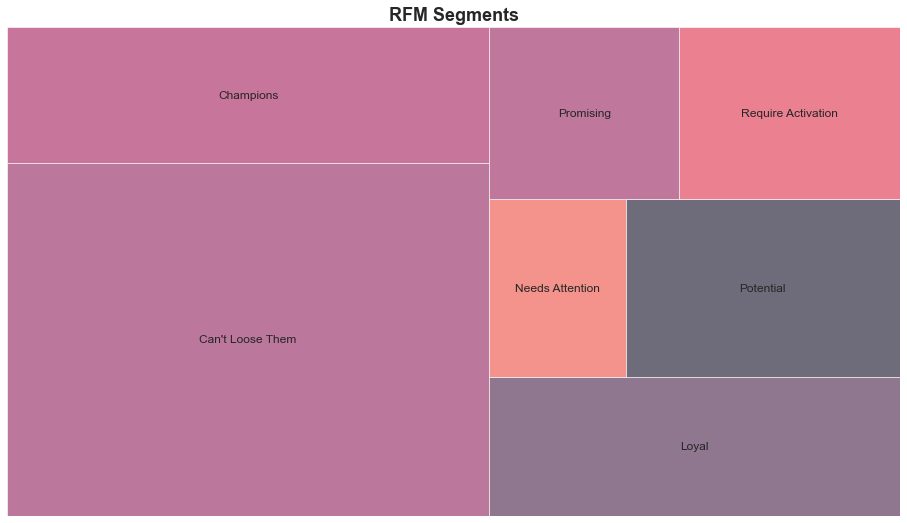

In [50]:
#!pip install squarify
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()